# Principal Component Analysis Mathematically (Without Libraries)

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
raw_data_train=pd.read_csv('data/mnist_train.csv')
raw_data_test=pd.read_csv('data/mnist_test.csv')

raw_data_train.head()

label  1x1  1x2  1x3  1x4  1x5  ...  28x23  28x24  28x25  28x26  28x27  28x28
0      5    0    0    0    0    0  ...      0      0      0      0      0      0
1      0    0    0    0    0    0  ...      0      0      0      0      0      0
2      4    0    0    0    0    0  ...      0      0      0      0      0      0
3      1    0    0    0    0    0  ...      0      0      0      0      0      0
4      9    0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]

In [5]:
raw_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


## Taking a quick look at some of the images from the dataset

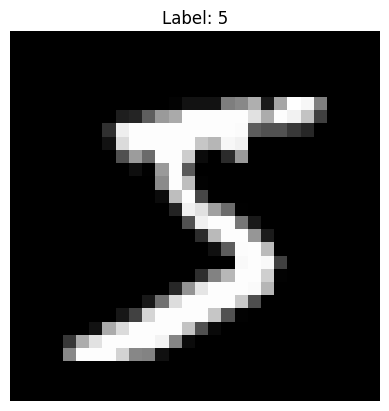

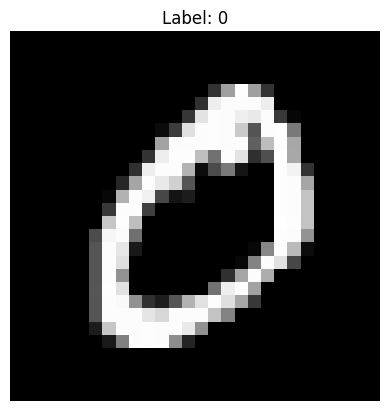

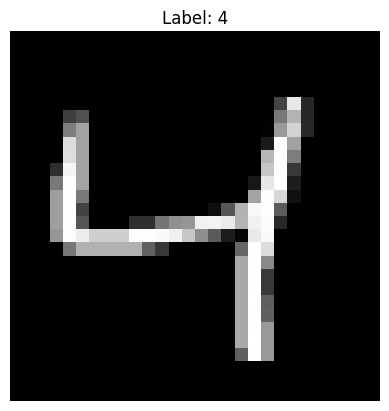

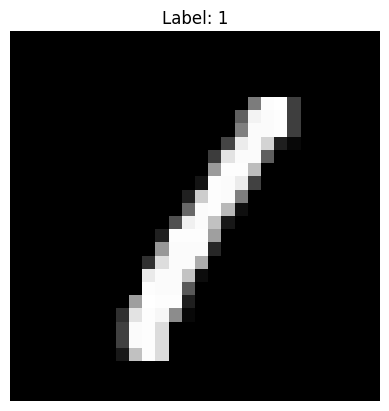

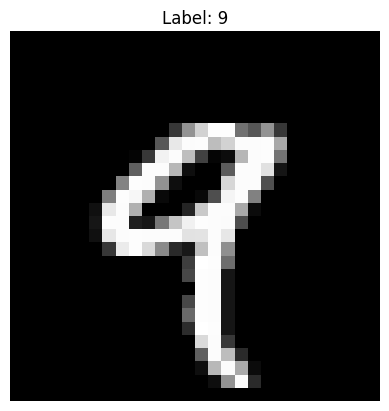

In [6]:
for i in range(5):
    # Picking a sample row
    sample = raw_data_train.iloc[i]

    label = sample['label']
    pixels = sample.drop('label').values.reshape(28, 28)
    
    plt.figure()
    plt.imshow(pixels, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()


### Normalising Data before applying PCA (Centering the data)

In [7]:
X = raw_data_train.drop('label', axis=1).values
y = raw_data_train['label'].values

X_norm= X-X.mean(axis=0)


### Applying PCA Algorithm Mathematically

##### Covariance Matrix

In [8]:
n=X_norm.shape[0]
C=(1/n) * (X_norm.T @ X_norm)
print(C.shape)

(784, 784)


#### Finding EigenValues and EigenVectors

In [9]:
eigvals, eigvecs = np.linalg.eigh(C)
# Sorting eigenvalues and eigenvectors in descending order
eigvals, eigvecs=eigvals[::-1],eigvecs[:,::-1]


#### Finding the Principal Components for various values of K and Visualising the results

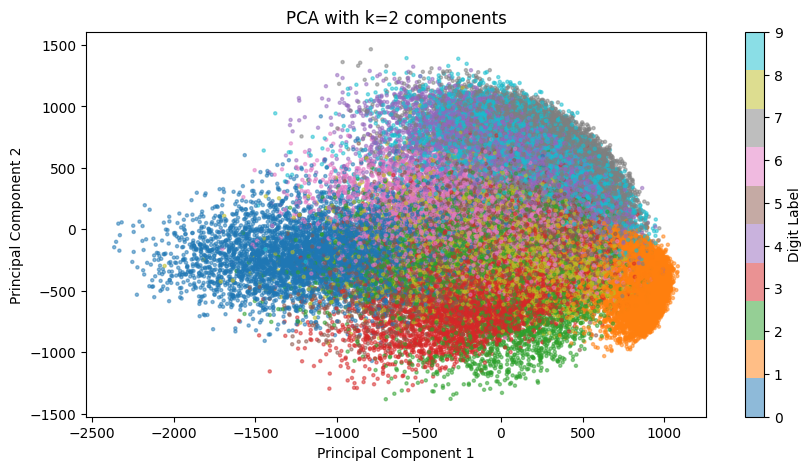

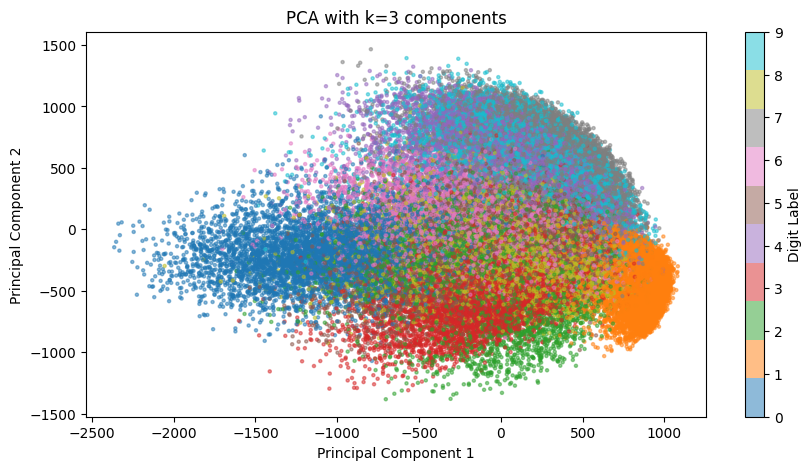

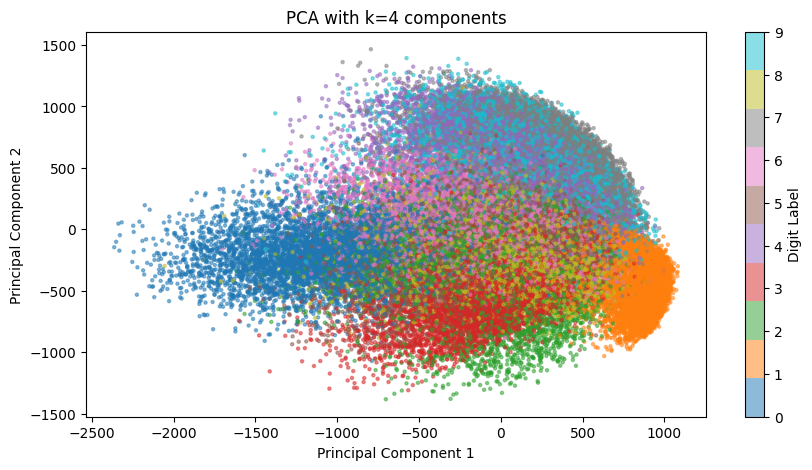

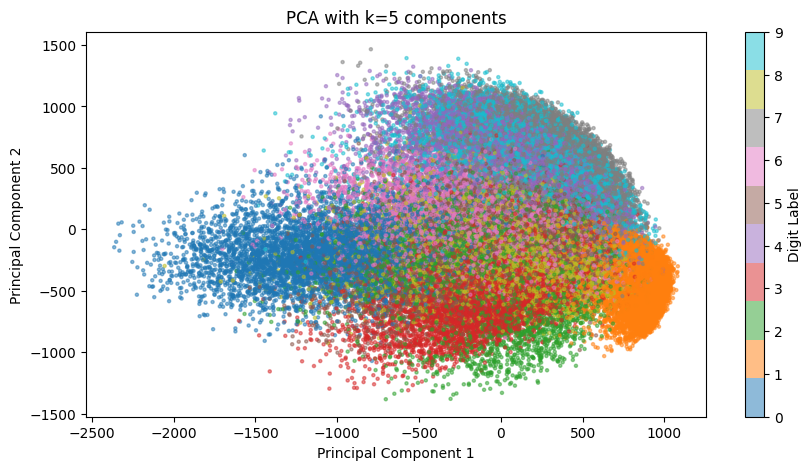

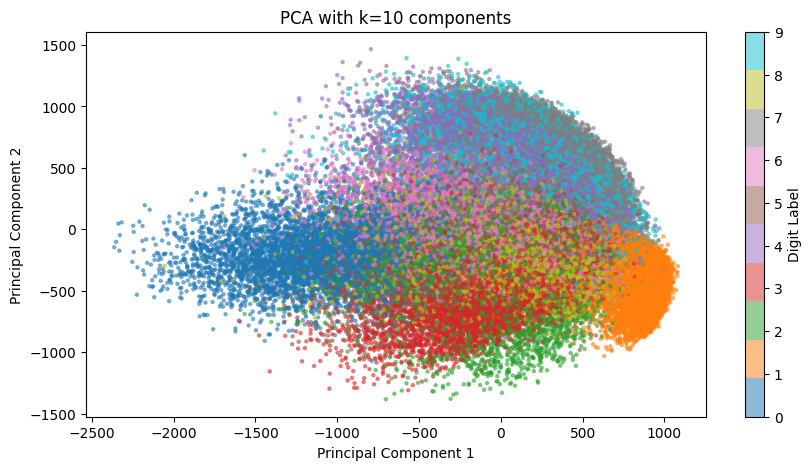

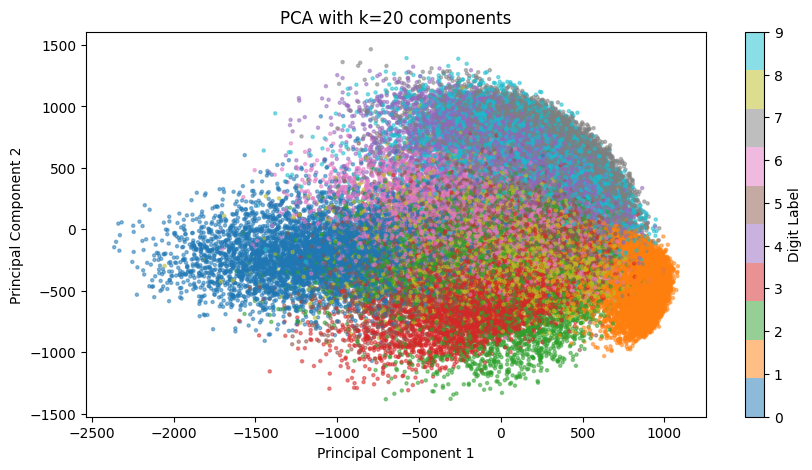

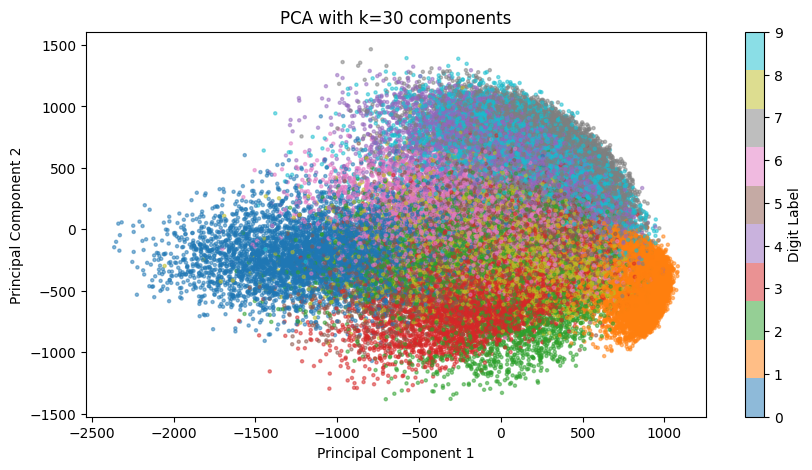

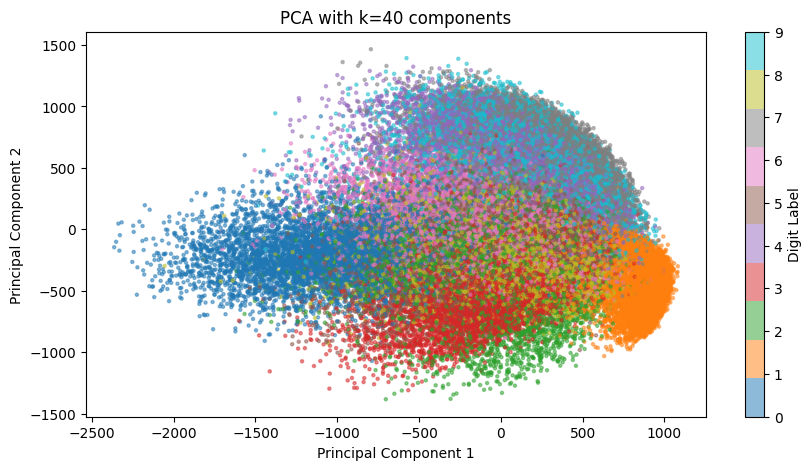

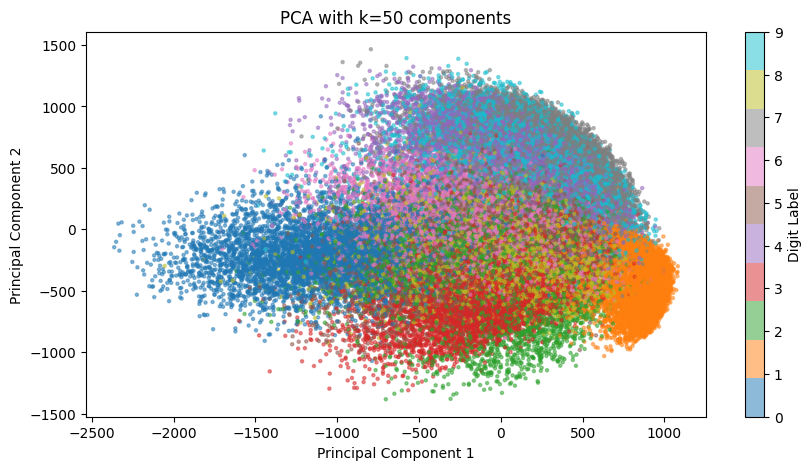

In [10]:
k=[2, 3, 4, 5, 10, 20, 30, 40, 50]
# Plotting the eigenvalues
for i in range(len(k)):
    w=eigvecs[:, :k[i]]
    Z=X_norm @ w
    plt.figure(figsize=(10, 5))
    plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap='tab10', s=5, alpha=0.5)
    plt.title(f"PCA with k={k[i]} components")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Digit Label')
    plt.show()
# Split the data into training and testing sets

#### Reconstrucing the Data

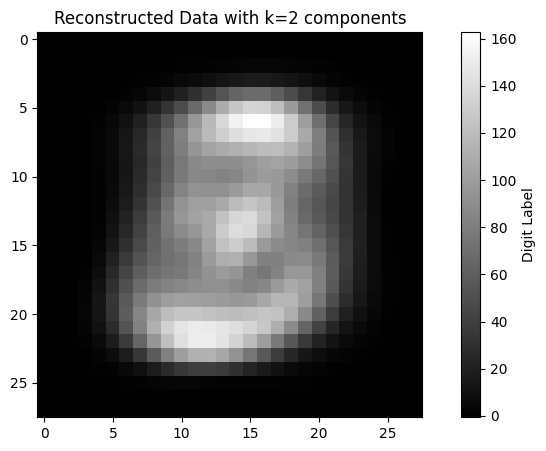

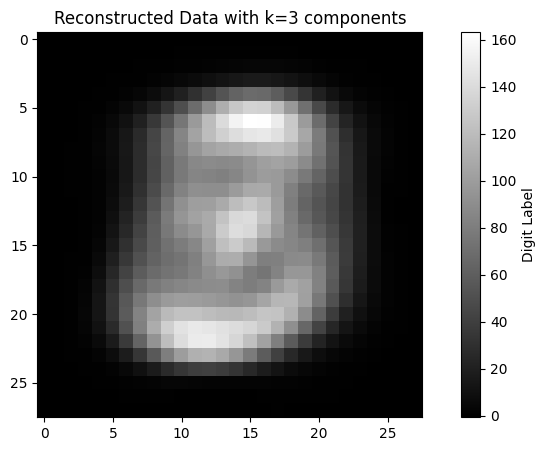

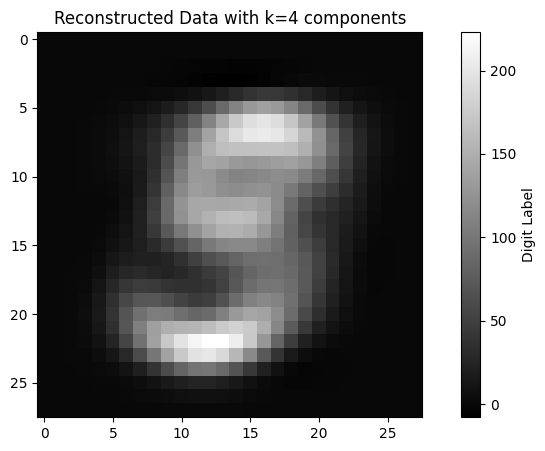

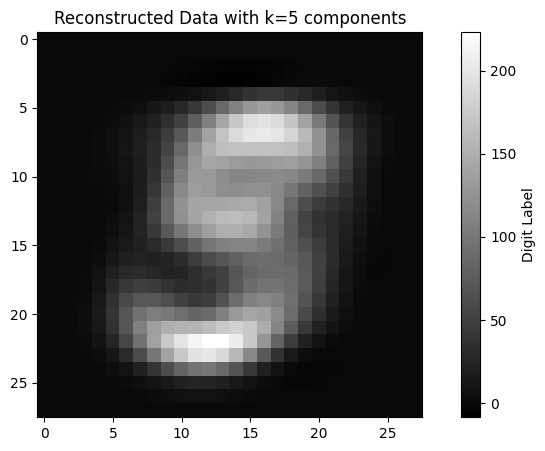

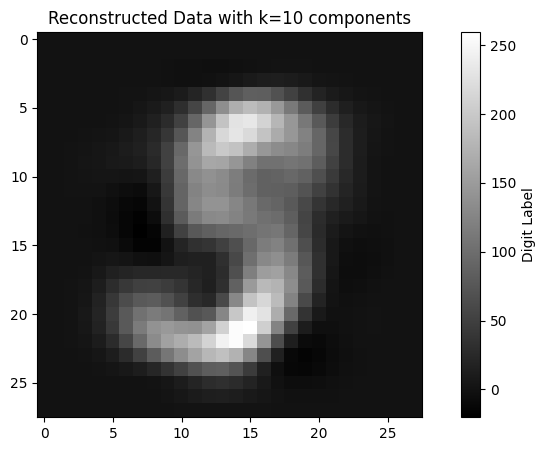

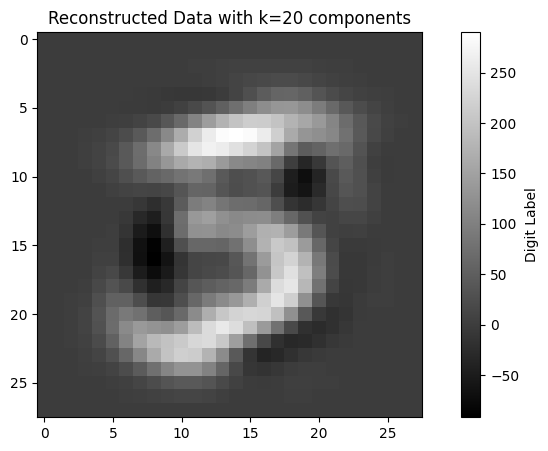

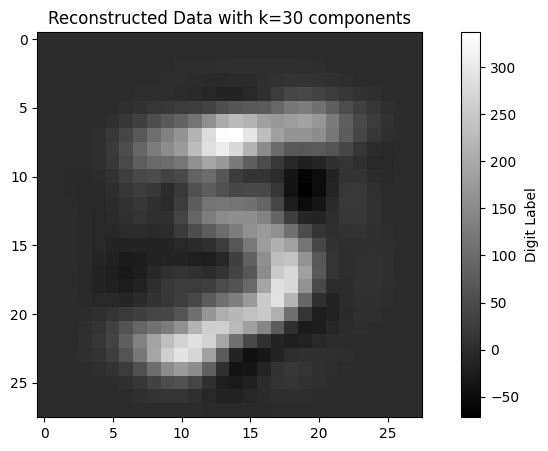

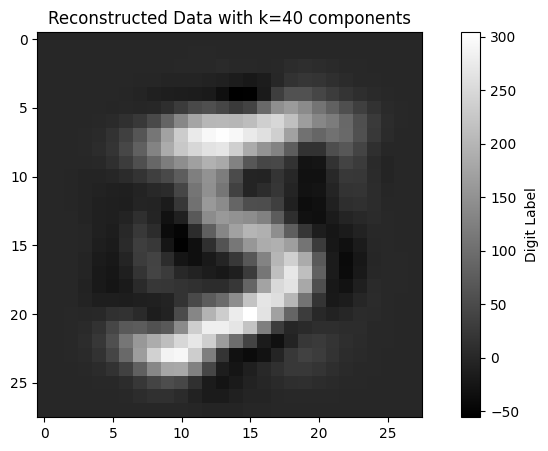

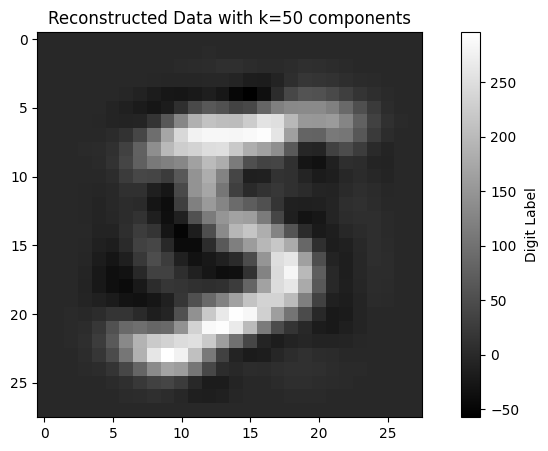

In [11]:
# Reconstructing the data
for i in range(len(k)):
    w=eigvecs[:, :k[i]]
    Z=X_norm @ w
    X_reconstructed = Z @ w.T + X.mean(axis=0)
    
    plt.figure(figsize=(10, 5))
    plt.title(f"Reconstructed Data with k={k[i]} components")
    plt.imshow(X_reconstructed[0].reshape(28, 28), cmap='gray')
    plt.colorbar(label='Digit Label')
    plt.show()

#### Reconstruction Error

Reconstruction error (RMSE) for k=2: 60.318525544381416
Reconstruction error (RMSE) for k=3: 58.03920412322199
Reconstruction error (RMSE) for k=4: 55.97203746234297
Reconstruction error (RMSE) for k=5: 54.03661397264604
Reconstruction error (RMSE) for k=10: 47.31098898912962
Reconstruction error (RMSE) for k=20: 39.47944846942023
Reconstruction error (RMSE) for k=30: 34.32692844187061
Reconstruction error (RMSE) for k=40: 30.583564754115375
Reconstruction error (RMSE) for k=50: 27.691555953875888


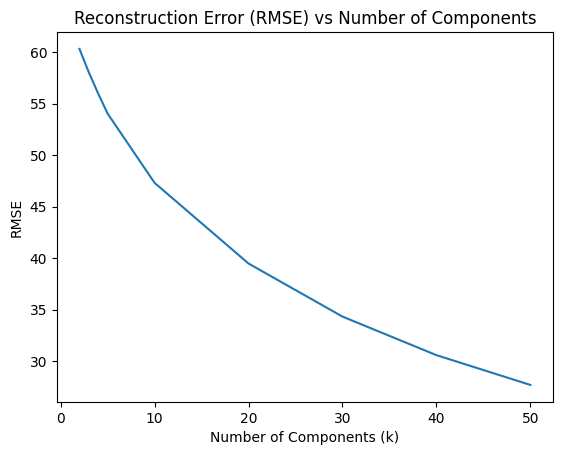

In [20]:
errors = []
for k_value in k:
    w = eigvecs[:, :k_value]
    Z = X_norm @ w
    X_reconstructed = Z @ w.T + X.mean(axis=0)
    
    # Calculate reconstruction error
    mse = np.mean(np.square(X - X_reconstructed))
    rmse = np.sqrt(mse)
    
    print(f"Reconstruction error (RMSE) for k={k_value}: {rmse}")
    errors.append(rmse)

# Plot reconstruction error for different k values
plt.plot(k, errors)
plt.xlabel('Number of Components (k)')
plt.ylabel('RMSE')
plt.title('Reconstruction Error (RMSE) vs Number of Components')
plt.show()


In [22]:
# r2 error
r2=[]
for k_value in k:
    w = eigvecs[:, :k_value]
    Z = X_norm @ w
    X_reconstructed = Z @ w.T + X.mean(axis=0)
    
    # Calculate R^2 error
    r2_value = 1-((np.sum(np.square(X-X_reconstructed)))/(np.sum(np.square(X-X.mean(axis=0)))))
    r2.append(r2_value)
    print(f"R^2 Error for k={k_value}: {r2_value}")

R^2 Error for k=2: 0.16800588418808948
R^2 Error for k=3: 0.22969677181176762
R^2 Error for k=4: 0.2835909666772979
R^2 Error for k=5: 0.33227893691204957
R^2 Error for k=10: 0.4881498035493427
R^2 Error for k=20: 0.6435808953674786
R^2 Error for k=30: 0.7305434714429186
R^2 Error for k=40: 0.7861077593790246
R^2 Error for k=50: 0.8246468633334729


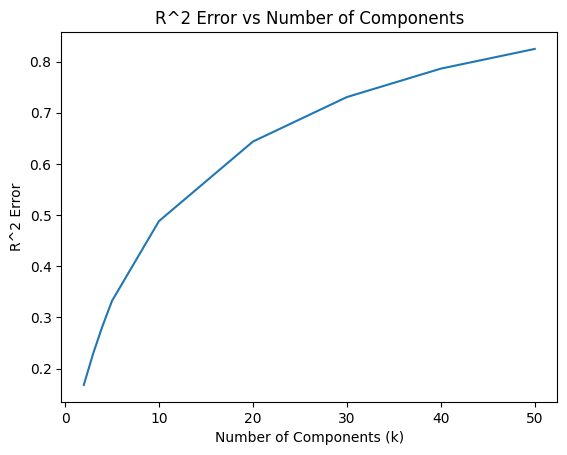

In [14]:
# Plotting r2 error vs k values
plt.plot(k,r2)
plt.xlabel('Number of Components (k)')
plt.ylabel('R^2 Error')
plt.title('R^2 Error vs Number of Components')
plt.show()
